# Explore the correlation between Tsys and WVR data

### Author: Hao He

ALMA high-frequency observation at Band 9 and Band 10 requires multiple Tsys measurements (more than 10) due to rapid sky variation. This is the project to explore the possibility to track system temeprature with alternative dataset (e.g. WVR, auto-correlation or SQLD data). 

In [1]:
# packags and functions
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def map_series_by_dict(a, d):

    v = np.array(list(d.values()))
    k = np.array(list(d.keys()))
    sidx = k.argsort()
    out_ar = v[sidx[np.searchsorted(k,a,sorter=sidx)]]
    return out_ar

def normalize_array(array, iants, obs_type, normScans=[0,0,0]):

    array_norm = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for i, obs in enumerate(obsType_uq):
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_sub = array[indices]
            array_norm[indices] = array_sub / array_sub[normScans[i]]

    return array_norm

def extrapolate_array(array, array_norm, iants, obs_type):

    array_ext = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for obs in obsType_uq:
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_start = array[indices][0]
            array_norm_sub = array_norm[indices]
            array_ext[indices] = array_start * array_norm_sub

    return array_ext

def select_array(array, iants, ATM_ids):
    iants_uq = np.unique(iants)
    nants = len(iants_uq)
    array_temp = array.reshape(-1, nants)
    
    array_sel = array_temp[ATM_ids,:]
    array_sel = array_sel.flatten()
    
    return array_sel

### Import the data

Specify the filename

In [2]:
Dir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/'
picDir = Dir+'pictures/'

filename = 'Tsys_WVR_matched_avgTime10.pkl'

# load the data
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
    
# # write the data back to the dictionary
# Tsys_table['info']['vis'] = 'uid___A002_Xec4ed2_X912.ms'
# with open(filename, 'wb') as handle:
#     pickle.dump(Tsys_table, handle)

# load the fitting results 
fitfile = 'Tsys_WVR_fitted_WVRchan0_normScans000.pkl'
with open(fitfile,'rb') as pickle_file:
    fit_table = pickle.load(pickle_file, encoding='latin')

Get the information of the data

In [3]:
info = Tsys_table['info']
vis = info['vis']
Tsys_spws = info['Tsys spw']

# keywords_title = ', '.join('{}  {}'.format(key, value) for key, value in info.items())
# keywords_filename = '_'.join('{}{}'.format(key, value) for key, value in info.items())
# keywords_filename = keywords_filename.replace(' ','')

iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']

Import the matched Tsys and WVR values

In [4]:
WVR = Tsys_table['WVR_means']
Trx = Tsys_table['Trx']
Tsky = Tsys_table['Tsky']
Tsys = Tsys_table['Tsys']
print(WVR)

[[166.13606262  80.53687286  45.61675644  33.85500717]
 [163.14938354  83.68128204  44.10720444  33.95620728]
 [167.58480835  85.80123138  44.38714981  33.48666763]
 ...
 [147.78556824  70.87930298  38.85352707  30.04017639]
 [155.01881409  70.48230743  40.83390427  32.01973343]
 [156.40927124  75.12848663  39.80241776  30.56545067]]


#### Plot Tsys versus WVR

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.93, 'uid___A002_Xec4ed2_X912, band7')

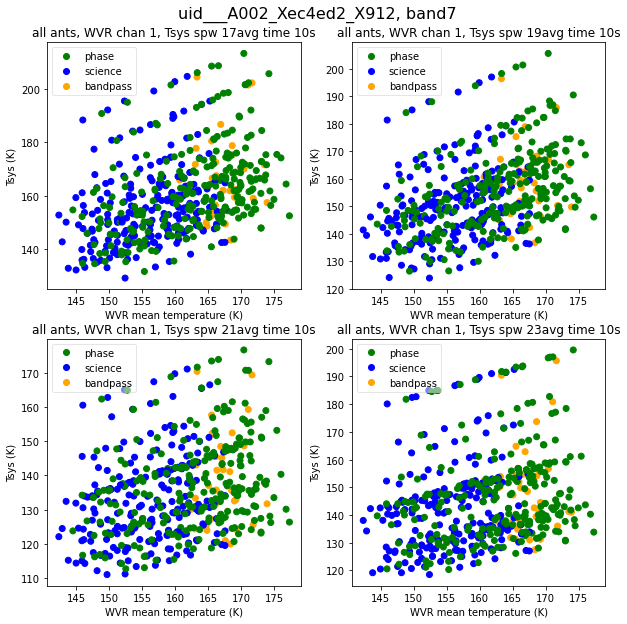

In [5]:
WVR_sinchan = WVR[:,0]
fig = plt.figure(figsize=(10,10))
for i in range(4):
    Tsys_sinspw = Tsys[:,i]
    ax = fig.add_subplot(2,2,i+1)

    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    # plot the scatter plot
    sc = ax.scatter(WVR_sinchan, Tsys_sinspw, c=map_series_by_dict(obs_type, color_dict))

    # title
    title = 'all ants, WVR chan 1, Tsys spw '+str(Tsys_spws[i])+'avg time 10s'
    plt.title(title)

    # label
    plt.xlabel('WVR mean temperature (K)')
    plt.ylabel('Tsys (K)')
    plt.legend(loc='upper left', framealpha=0.5)
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)

fig.suptitle('uid___A002_Xec4ed2_X912, band7', fontsize=16, y=0.93)
# plt.savefig(picDir+'/Tsys_WVR_correlaltoin'+keywords_filename)

#### Normalized Tsys versus WVR

Normalize the Tsys and WVR value to the first of the measurement for each antenna

[0.98132192 0.01796555] [0.00506606]
[0.96904539 0.02920588] [0.00517265]
[0.75657911 0.24184416] [0.00464451]
[0.72207874 0.27666002] [0.00462424]


Text(0.5, 0.93, 'uid___A002_Xec4ed2_X912, band7')

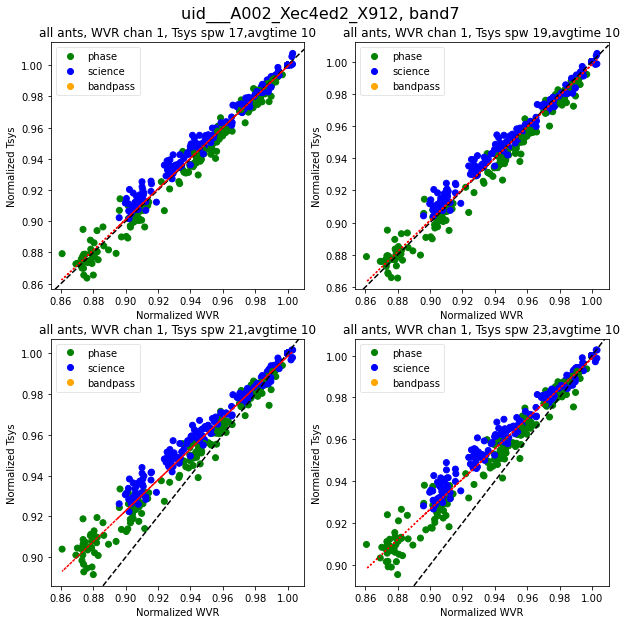

In [6]:
WVR_sinchan = WVR[:,0]
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
fig = plt.figure(figsize=(10,10))
for i in range(4):
    Tsys_sinspw = Tsys[:,i]
    Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
    ax = fig.add_subplot(2,2,i+1)

    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    # plot the scatter plot
    sc = ax.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict))

    # plot the 1-to-1 line
    lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
    upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
    ax.plot([lower, upper],[lower,upper],ls='--', color='black')

    # fit the linear relation between normalized Tsys and WVR
    xdata = WVR_norm; ydata = Tsys_norm
    idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
    fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
    fit_coeff = fit_results[0]
    fit_err = fit_results[1]
    fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
    ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]
    plt.plot(xdata, ydata_fitted, color='red', linestyle='dotted',
            label=str(round(fit_coeff[0], 4))+'*x+'+str(round(fit_coeff[1], 4))
            +'\n err: '+str(round(fit_err[0], 4)))

    print(fit_coeff, fit_err_rel)

    # title
    title = 'all ants, WVR chan 1, Tsys spw '+str(Tsys_spws[i])+',avgtime 10'
    plt.title(title)

    # label
    plt.xlabel('Normalized WVR')
    plt.ylabel('Normalized Tsys')
    plt.legend(loc='upper left', framealpha=0.5)
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)

fig.suptitle('uid___A002_Xec4ed2_X912, band7', fontsize=16, y=0.93)
# plt.savefig(picDir+'band7/Tsys_WVR_correlaltoin'+keywords_filename)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.97190607 0.02915866] [0.00383399]
[0.96549371 0.03535287] [0.0039649]
[0.74803244 0.2526928 ] [0.00351939]
[0.7119368  0.28881779] [0.00345213]


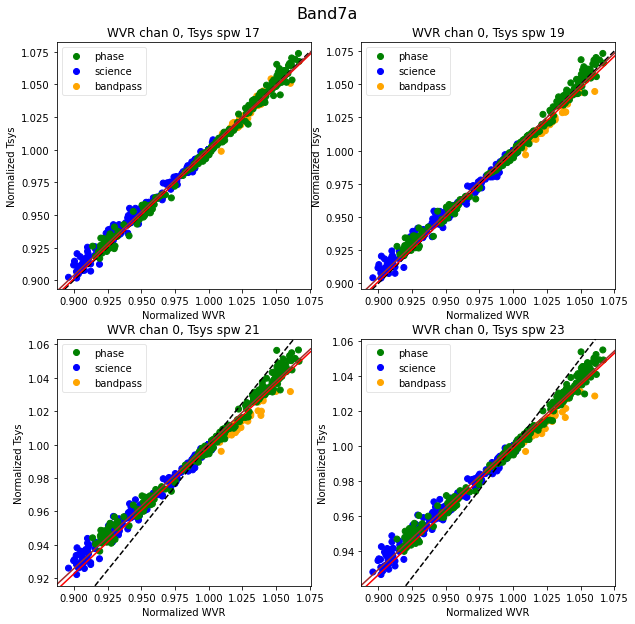

In [7]:
obs_type_temp = np.chararray(np.shape(obs_type), itemsize=10, unicode=False)
obs_type_temp[:] = 'science'
obs_type_temp = obs_type_temp.astype(str)
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type_temp, normScans=[2])

fig = plt.figure(figsize=(10,10))
for i in range(4):
    Tsys_sinspw = Tsys[:,i]
    Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type_temp, normScans=[2])
    ax = fig.add_subplot(2,2,i+1)

    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    # plot the scatter plot
    sc = ax.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict))

    # plot the 1-to-1 line
    lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
    upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
    ax.plot([lower, upper],[lower,upper],ls='--', color='black')
    
    # plot the original fitted results
    slope = fit_table[17+2*i]['coeff'][0]
    intercept = fit_table[17+2*i]['coeff'][1]
    xlow = ax.set_xlim()[0]; xhigh = ax.set_xlim()[1]
    ylow = xlow * slope + intercept; yhigh = xhigh * slope + intercept
#     Tsys_norm_fitted_orig = slope * WVR_norm + intercept
    plt.plot([xlow, xhigh], [ylow, yhigh], color='red', linestyle='solid')

    # fit the linear relation between normalized Tsys and WVR
    xdata = WVR_norm; ydata = Tsys_norm
    # exclude the bandpass data in the fitting
    ydata[np.where(obs_type=='bandpass')] = np.nan
    
    idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
    fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
    fit_coeff = fit_results[0]
    fit_err = fit_results[1]
    fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
#     ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]
    ylow = xlow * fit_coeff[0] + fit_coeff[1]; yhigh = xhigh * fit_coeff[0] + fit_coeff[1]                                                                                        
    plt.plot([xlow, xhigh], [ylow, yhigh], color='brown', linestyle='solid')

    print(fit_coeff, fit_err_rel)
    
    # title
    title = 'WVR chan 0, Tsys spw '+str(Tsys_spws[i])
    plt.title(title)

    # label
    plt.xlabel('Normalized WVR')
    plt.ylabel('Normalized Tsys')
    plt.legend(loc='upper left', framealpha=0.5)
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)
    
fig.suptitle('Band7a', fontsize=16, y=0.93)
plt.savefig(picDir+'E2E8.1.00003.S/Tsys_WVR_norm_correlation_sci.pdf', bbox_inches='tight', pad_inches=0)

#### Fewer Tsys versus WVR

Select a few Tsys instead of all the Tsys measurements

[ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 35 35 35 35 35 35 35 35 35 35 35 35
 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35]
0.00523795133799101
[ 1.01182071 -0.01173426] [0.00392932]
0.00579417228314841
[ 1.03020076 -0.03018541] [0.00414288]
0.005155301674003368
[0.80995081 0.19007358] [0.00378104]
0.004971214483931646
[0.76554433 0.23447941] [0.00373594]


Text(0.5, 0.93, 'uid___A002_Xec4ed2_X912, band7')

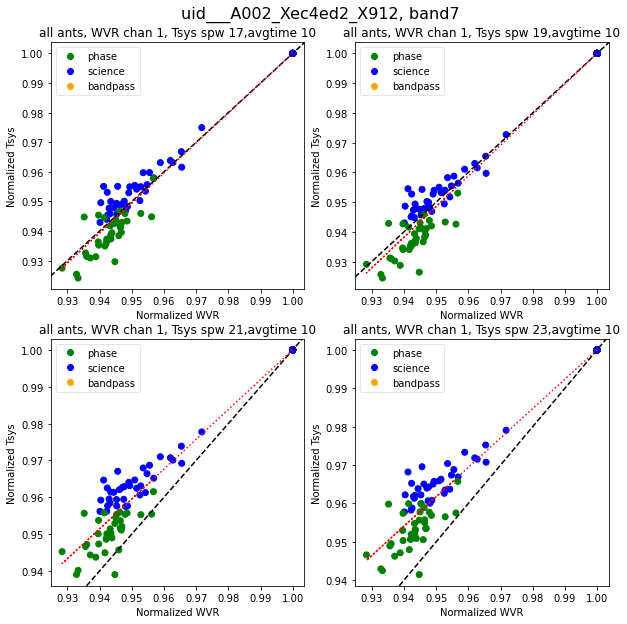

In [9]:
# select only a handful of ATM scans
WVR_sinchan = WVR[:,0]
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
ATM_ids = [1,2,8,9]
WVR_norm_few = select_array(WVR_norm, iants, ATM_ids)
scans_few = select_array(scans, iants, ATM_ids)
print(scans_few)

fig = plt.figure(figsize=(10,10))
for i in range(4):
    Tsys_sinspw = Tsys[:,i]
    Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
    Tsys_norm_few = select_array(Tsys_norm, iants, ATM_ids)
    obs_type_few = select_array(obs_type, iants, ATM_ids)
    
    ax = fig.add_subplot(2,2,i+1)

    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
    legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]

    # plot the scatter plot
    sc = ax.scatter(WVR_norm_few, Tsys_norm_few, c=map_series_by_dict(obs_type_few, color_dict))

    # plot the 1-to-1 line
    lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
    upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
    ax.plot([lower, upper],[lower,upper],ls='--', color='black')

    # fit the linear relation between normalized Tsys and WVR
    xdata = WVR_norm_few; ydata = Tsys_norm_few
    idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
    fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
    fit_coeff = fit_results[0]
    fit_err = fit_results[1]
    fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
    ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]

    Tsys_ext_norm = fit_coeff[0] * WVR_norm + fit_coeff[1]
    scatter = np.sqrt(np.nanmean((Tsys_ext_norm-Tsys_norm)**2)) / np.nanmean(Tsys_norm)
    print(scatter)
    
    plt.plot(xdata, ydata_fitted, color='red', linestyle='dotted',
            label=str(round(fit_coeff[0], 4))+'*x+'+str(round(fit_coeff[1], 4))
            +'\n err: '+str(round(fit_err[0], 4)))

    print(fit_coeff, fit_err_rel)

    # title
    title = 'all ants, WVR chan 1, Tsys spw '+str(Tsys_spws[i])+',avgtime 10'
    plt.title(title)

    # label
    plt.xlabel('Normalized WVR')
    plt.ylabel('Normalized Tsys')
    plt.legend(loc='upper left', framealpha=0.5)
    plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)

fig.suptitle('uid___A002_Xec4ed2_X912, band7', fontsize=16, y=0.93)
# plt.savefig(picDir+'band7/Tsys_WVR_correlaltoin'+keywords_filename)